#PRACTICAL

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

1. Write a Python program that loads a dataset, splits it into training and testing sets, applies Logistic
Regression, and prints the model accuracy.

In [2]:
from sklearn.datasets import load_iris   #importing dataset from scikit learn library
data = load_iris()
#converting dataset to dataframe

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#separating X and Y
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [4]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [6]:
#applying train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [7]:
#building the model using Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test)

In [9]:
#printing accurcay score
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

1.0


2. Write a Python program to apply L1 regularization (Lasso) on a dataset using LogisticRegression(penalty='l1')
and print the model accuracyC

In [10]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
X,y = make_classification(n_samples = 1000, n_features = 10, n_classes = 2, n_informative= 5,  n_redundant= 5, random_state=34)

In [12]:
X

array([[ 0.74900421,  1.88096426, -0.54222687, ..., -2.47652014,
        -1.58461491,  0.2110196 ],
       [ 0.81258101, -0.3712229 ,  0.5824231 , ..., -3.38801876,
        -2.30231954,  0.65686137],
       [ 1.36365811,  3.18012986,  0.62427104, ..., -4.46170009,
        -1.84261299, -0.73405536],
       ...,
       [ 0.82591408,  2.10008331,  1.13183458, ..., -1.93778244,
         0.27643544,  0.13994665],
       [ 0.71687202,  1.0774083 , -0.66829399, ..., -2.75062939,
        -2.34342937, -0.09207217],
       [ 0.64383098,  1.68896062,  0.37327834, ..., -1.61404785,
        -1.111992  , -3.3453997 ]])

In [13]:
y

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,

In [14]:
#applying train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape

(800, 10)

In [16]:
#model building using L1 penlalty
model = LogisticRegression(penalty='l1', solver='liblinear')
model.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [17]:
y_pred = model.predict(X_test)

In [18]:
print(accuracy_score(y_test,y_pred))

0.67


3. Write a Python program to train Logistic Regression with L2 regularization (Ridge) using
LogisticRegression(penalty='l2'). Print model accuracy and coefficien

In [19]:
#building model using the same X,y as in Q2.

model = LogisticRegression(penalty= 'l2', solver = 'liblinear')
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [20]:
y_pred = model.predict(X_test)
print(model.coef_)
print(accuracy_score(y_test,y_pred))

[[-0.0212793  -0.48699911  0.16197115  0.12164766 -0.06094677  0.07244247
   0.3272612  -0.09163303 -0.0557394   0.4138204 ]]
0.665


4. Write a Python program to train Logistic Regression with Elastic Net Regularization (penalty='elasticnet').


In [21]:
#building model using the same X,y as in Q2
model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5)
model.fit(X_train,y_train)

LogisticRegression(l1_ratio=0.5, penalty='elasticnet', solver='saga')

In [22]:
y_pred = model.predict(X_test)
print(model.coef_)
print(accuracy_score(y_test,y_pred))

[[ 0.         -0.56329063  0.03859106  0.10886174  0.          0.
   0.27870722 -0.14962995  0.          0.42354956]]
0.665


5. Write a Python program to train a Logistic Regression model for multiclass classification using
multi_class='ovr'C

In [23]:
X,y= make_classification(n_samples=1000, n_features = 10,n_classes = 3, n_informative=5 , n_redundant=5, random_state=45)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=1, test_size= 0.3)

In [25]:
model = LogisticRegression(multi_class= 'ovr', solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [26]:
y_pred = model.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.7033333333333334


6. Write a Python program to apply GridSearchCV to tune the hyperparameters (C and penalty) of Logistic
Regression. Print the best parameters and accuracy.

In [27]:
from sklearn.model_selection import GridSearchCV

parameter = {'C':[0.001,0.01,0.1,1,10],
             'penalty': ['l1','l2','elasticnet']}
model = GridSearchCV(LogisticRegression(), param_grid = parameter, verbose =2 , cv = 5)

In [28]:
model

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [29]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l1; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ................................C=0.001, penalty=l2; total time=   0.0s
[CV] END ........................C=0.001, penalty=elasticnet; total time=   0.0s
[CV] END ........................C=0.001, penalt

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             verbose=2)

In [30]:
model.best_params_  #getting the best parameters

{'C': 1, 'penalty': 'l2'}

In [31]:
y_pred =  model.best_estimator_.predict(X_test) #predicting y with the best estimator

In [32]:
print(accuracy_score(y_test,y_pred)) # accuracy of the model

0.7033333333333334


7. Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the
average accuracyC

In [33]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [34]:
model = cross_val_score(LogisticRegression(), X,y, cv = skf, scoring= 'accuracy' )

In [35]:
print('the average accuracy of the model is:',model.mean())

the average accuracy of the model is: 0.7019999999999998


8. Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its
accuracy.

In [36]:
df = pd.read_csv('/content/Dataset of Diabetes .csv')

In [37]:
df

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,NaN,NaN,NaN
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N,NaN,NaN,NaN
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,NaN,NaN,NaN
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N,NaN,NaN,NaN
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,200,454317,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y,NaN,NaN,NaN
996,671,876534,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y,NaN,NaN,NaN
997,669,87654,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y,NaN,NaN,NaN
998,99,24004,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y,NaN,NaN,NaN


In [38]:
df.isna().sum()

,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [39]:
df.drop(['Unnamed: 14','Unnamed: 15', "Unnamed: 16",'ID','No_Pation'],axis = 1, inplace = True)

In [40]:
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,Y
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,Y
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,Y
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,Y


In [41]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [42]:
df.CLASS.value_counts()

,count
CLASS,
Y,840
N,102
P,53
Y,4
N,1


In [43]:
# Strip leading/trailing spaces and convert to uppercase
df['CLASS'] = df['CLASS'].str.strip().str.upper()

In [44]:
df['CLASS'].value_counts()  #now there is accurate count of each class

,count
CLASS,
Y,844
N,103
P,53


In [45]:
#N : not diabetic , Y : Diabetic, P: Pre- diabetic
#encoding

df['CLASS'] = df['CLASS'].map({'N':0,'P':1,'Y':2})
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,M,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,M,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,M,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,M,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


In [46]:
df['Gender'].value_counts()

,count
Gender,
M,565
F,434
f,1


In [47]:
df.Gender = df.Gender.str.strip().str.upper()
df['Gender'] = df['Gender'].map({'M':0,'F':1})
df

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,0
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,0
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0,2
996,0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2,2
997,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4,2
998,0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5,2


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  1000 non-null   int64  
 1   AGE     1000 non-null   int64  
 2   Urea    1000 non-null   float64
 3   Cr      1000 non-null   int64  
 4   HbA1c   1000 non-null   float64
 5   Chol    1000 non-null   float64
 6   TG      1000 non-null   float64
 7   HDL     1000 non-null   float64
 8   LDL     1000 non-null   float64
 9   VLDL    1000 non-null   float64
 10  BMI     1000 non-null   float64
 11  CLASS   1000 non-null   int64  
dtypes: float64(8), int64(4)
memory usage: 93.9 KB


In [49]:
#separating independeXnt and dependent variables
X = df.drop('CLASS', axis = 1)
y = df['CLASS']

In [50]:
X

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
1,0,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0
2,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
3,1,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0
4,0,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0,71,11.0,97,7.0,7.5,1.7,1.2,1.8,0.6,30.0
996,0,31,3.0,60,12.3,4.1,2.2,0.7,2.4,15.4,37.2
997,0,30,7.1,81,6.7,4.1,1.1,1.2,2.4,8.1,27.4
998,0,38,5.8,59,6.7,5.3,2.0,1.6,2.9,14.0,40.5


In [51]:
y

,CLASS
0,0
1,0
2,0
3,0
4,0
...,...
995,2
996,2
997,2
998,2


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [53]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [54]:
X_train.shape, y_test.shape

((700, 11), (300,))

In [55]:
diabetes_model = LogisticRegression()
diabetes_model.fit(X_train,y_train)

LogisticRegression()

In [56]:
diab_prediction = diabetes_model.predict(X_test)

In [57]:
print("The accuracy of the model is :", accuracy_score(y_test, diab_prediction))

The accuracy of the model is : 0.8633333333333333


9. Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in
Logistic Regression. Print the best parameters and accuracy.

In [58]:
X_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
541,0,60,2.10,56,7.6,3.3,1.70,0.90,1.7,0.8,36.6
440,0,55,3.33,79,9.7,4.1,2.03,1.08,2.2,14.0,33.6
482,0,57,4.10,63,9.7,3.6,5.10,0.90,2.5,0.9,30.0
422,1,58,3.90,40,11.4,4.1,1.00,0.90,1.7,1.7,26.0
778,0,53,5.90,67,9.9,5.2,1.80,0.90,3.6,0.6,33.0
...,...,...,...,...,...,...,...,...,...,...,...
106,0,31,3.40,55,5.7,4.9,1.60,1.00,3.2,0.7,24.0
270,1,52,6.00,76,6.5,2.7,1.20,0.80,1.4,0.5,31.0
860,0,60,20.80,800,9.0,2.3,1.10,0.90,0.9,0.5,33.0
435,1,52,7.60,84,8.1,4.2,2.00,0.70,2.6,0.9,36.0


In [59]:
y_train

,CLASS
541,2
440,2
482,2
422,2
778,2
...,...
106,1
270,2
860,2
435,2


In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
model = LogisticRegression()
param= {"C": [0.001,0.001,0.1,1,10],
        "penalty" :["l1",'l2','elasticnet'],
        "solver": ["lbfgs","liblinear",'saga']}

randomized_model = RandomizedSearchCV(model, param_distributions= param, cv = 5,verbose = 2, scoring = 'accuracy')

In [62]:
randomized_model

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.001, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'saga']},
                   scoring='accuracy', verbose=2)

In [63]:
randomized_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......................C=10, penalty=l1, solver=saga; total time=   0.1s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .............C=0.1, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=1, penalty=elasticnet, 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.001, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'liblinear',
                                                   'saga']},
                   scoring='accuracy', verbose=2)

In [64]:
randomized_model.best_estimator_

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [65]:
randomized_model.best_params_

{'solver': 'liblinear', 'penalty': 'l1', 'C': 10}

In [66]:
y_pred = randomized_model.best_estimator_.predict(X_test)

In [67]:
print("The accuracy of the model is :", accuracy_score(y_test, y_pred))

The accuracy of the model is : 0.9433333333333334


10. Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy


In [68]:
y_train.value_counts()  #y_train from diabetes data set is a multiclass series

,count
CLASS,
2,590
0,67
1,43


In [69]:
from sklearn.multiclass import OneVsOneClassifier
ovo_classifier = OneVsOneClassifier(LogisticRegression())
ovo_classifier.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression())

In [70]:
y_pred = ovo_classifier.predict(X_test)
print("the accuracy score of this model is :", accuracy_score(y_test,y_pred))

the accuracy score of this model is : 0.9


11.  Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary
classification

In [71]:
#importing all the required libraries
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#make a binary dataset
X,y = make_classification(n_samples = 500, n_features = 10,n_informative= 5, n_redundant=5, n_classes = 2, random_state=1)

In [72]:
X,y

(array([[-1.18270629,  1.00890182, -2.37942616, ...,  1.31372202,
         -0.75778705,  0.14712536],
        [-0.37077181, -1.96365745, -2.35591896, ...,  2.19394952,
          0.3123475 ,  0.18213755],
        [-2.59556891,  3.24897268,  0.1810616 , ..., -1.41466103,
         -1.42035465, -0.97074981],
        ...,
        [-1.4792769 ,  0.50042811, -3.1080341 , ...,  1.27854267,
          0.25621941,  0.46857849],
        [-0.02709894,  0.42533624, -2.05195544, ...,  1.63052609,
         -0.48787266,  0.60202959],
        [ 2.26161295, -2.57853511, -1.61870141, ...,  2.54312195,
          1.88701209,  2.06716147]]),
 array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
   

In [73]:
#train-tets split
X_train,X_test,y_train,y_test = train_test_split(X,y , test_size = 0.25, random_state = 1)

In [74]:
X_train.shape,X_test.shape,y_train.shape

((375, 10), (125, 10), (375,))

In [75]:
#building the model
model = LogisticRegression(penalty = 'l1', solver = 'liblinear')
model.fit(X_train,y_train)

#prediciting y
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[44, 19],
       [13, 49]])

Text(0.5, 1.0, 'Confusion Matrix')

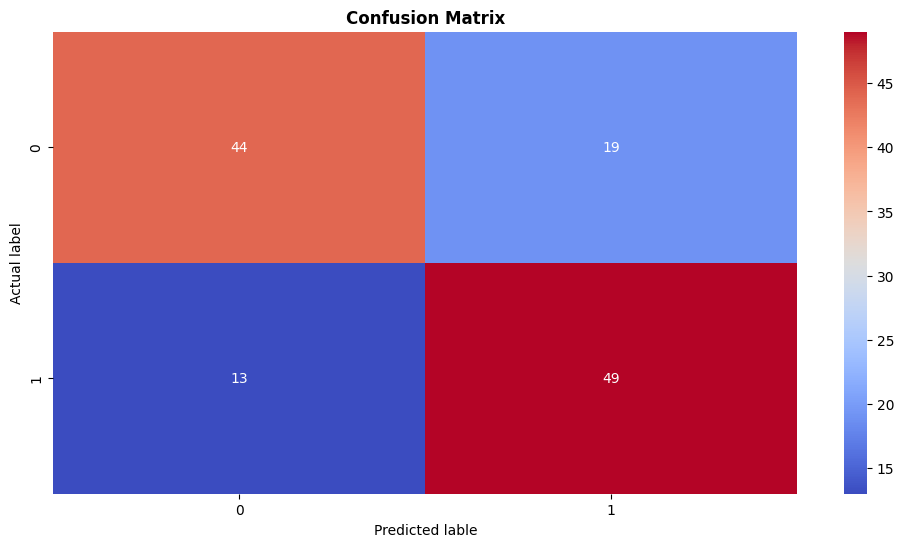

In [76]:
#visualising Confusion matirx
plt.figure(figsize = (12,6))
sns.heatmap(cm, annot = True, cmap = 'coolwarm', fmt = 'd')
plt.xlabel("Predicted lable")
plt.ylabel("Actual label")
plt.title("Confusion Matrix", fontweight = 'bold')

12. Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,
Recall, and F1-Score

In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score

i'll be using the same model as in Q11.

In [78]:
print("The precision score of the model is:", precision_score(y_test,y_pred))
print("The recall score of the model is:", recall_score(y_test,y_pred))
print("The f1-score of the model is:", f1_score(y_test,y_pred))

The precision score of the model is: 0.7205882352941176
The recall score of the model is: 0.7903225806451613
The f1-score of the model is: 0.7538461538461538


13. Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to
improve model performanceM

In [79]:
X,y = make_classification(n_samples = 1000, n_features = 10, n_informative  = 5 , n_redundant = 0, n_classes = 2, weights = [0.9,0.1], random_state = 1)

In [80]:
X

array([[-0.35741525, -0.28742304,  0.76640403, ...,  0.46561214,
        -0.20022676,  0.3778464 ],
       [-2.55385443, -1.04502548,  0.41991143, ...,  1.36124455,
         0.14001327, -1.07548279],
       [-2.1348261 , -0.92280789,  0.24831589, ...,  2.40945678,
        -0.11964547,  1.05074359],
       ...,
       [-0.68379519,  0.55029916, -3.38453335, ...,  1.00705254,
         1.0607576 , -1.70541978],
       [ 0.92119588,  0.5907163 ,  2.72882215, ..., -0.98744419,
         0.36520739,  0.76463328],
       [-1.78655517, -1.44804859,  0.65604401, ...,  0.99010748,
        -0.31567492, -0.30763498]])

In [81]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size = 0.3, random_state = 1)

In [83]:
X_train.shape

(700, 10)

In [84]:
model =LogisticRegression(class_weight = 'balanced')
model.fit(X_train,y_train)

LogisticRegression(class_weight='balanced')

In [85]:
y_pred = model.predict(X_test)
print("The accuracy of the model is:", accuracy_score(y_test,y_pred))

The accuracy of the model is: 0.76


14. Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and
evaluate performanceM

In [86]:
df = sns.load_dataset("titanic")
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [87]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [88]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [89]:
df = df.drop('deck',axis =1)

In [90]:
df['age'].fillna(df.age.median(),inplace = True)

In [91]:
df.isna().sum()

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [93]:
df['class'].value_counts()

,count
class,
Third,491
First,216
Second,184


In [94]:
df['class'] = df['class'].map({"Third":3,"Second":2,"First":1}).astype(int)

In [95]:
df['class'].value_counts()   #now it has been converted into numerical column

,count
class,
3,491
1,216
2,184


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    int64  
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  889 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(5)
memory usage: 85.4+ KB


In [97]:
df = df.drop(['alive','embark_town'], axis = 1)

In [98]:
#dropping alive and embark_town column since these are same as survived and embarked columns

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    889 non-null    object 
 8   class       891 non-null    int64  
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(3)
memory usage: 71.5+ KB


In [100]:
df['embarked'].value_counts()

,count
embarked,
S,644
C,168
Q,77


In [101]:
df['embarked'] = df['embarked'].map({'S':0,'C':1,'Q':2})

In [102]:
df.embarked.fillna(df.embarked.mode()[0], inplace = True)

In [103]:
df['embarked'] =  df.embarked.astype(int)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    object 
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int64  
 8   class       891 non-null    int64  
 9   who         891 non-null    object 
 10  adult_male  891 non-null    bool   
 11  alone       891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 71.5+ KB


In [105]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]
X = pd.get_dummies(X, columns=['sex', 'embarked'], drop_first=True)

In [106]:
X

,pclass,age,sibsp,parch,fare,sex_male,embarked_1,embarked_2
0,3,22.0,1,0,7.2500,True,False,False
1,1,38.0,1,0,71.2833,False,True,False
2,3,26.0,0,0,7.9250,False,False,False
3,1,35.0,1,0,53.1000,False,False,False
4,3,35.0,0,0,8.0500,True,False,False
...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,True,False,False
887,1,19.0,0,0,30.0000,False,False,False
888,3,28.0,1,2,23.4500,False,False,False
889,1,26.0,0,0,30.0000,True,True,False


In [107]:
y = df.survived

In [108]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [109]:
X_train.shape,X_test.shape

((623, 8), (268, 8))

In [110]:
#model building
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [111]:
y_pred = model.predict(X_test)

In [112]:
print("The accuracy score of the model is", accuracy_score(y_test,y_pred))
print("The confusion matrix of the model is", confusion_matrix(y_test,y_pred))
print("The f1 score of the model is", f1_score(y_test,y_pred))


The accuracy score of the model is 0.8134328358208955
The confusion matrix of the model is [[137  20]
 [ 30  81]]
The f1 score of the model is 0.7641509433962265


15. Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression
model. Evaluate its accuracy and compare results with and without scalingM

In [113]:
#WITHOUT SCALING

X,y = make_classification(n_samples = 1000, n_features = 20, n_informative = 10, n_redundant = 0, n_classes = 2, random_state = 1)

In [114]:
#train yesy split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [115]:
X_train

array([[ 1.05375007, -0.97733302,  0.11805676, ...,  0.42500203,
         1.42857272,  0.09836888],
       [ 2.56146337, -1.54555456,  2.12010255, ...,  0.52422416,
        -0.77802327,  1.33057638],
       [ 3.10331304,  0.85984487,  0.98774938, ...,  1.14941536,
         1.30453841, -0.21655916],
       ...,
       [ 3.44204578,  0.65240599, -2.17936836, ..., -0.6633785 ,
        -1.08018534, -0.53425426],
       [-1.98309216, -0.30409189, -0.86874899, ...,  1.4844882 ,
         0.93648422,  0.39241869],
       [-0.2920971 , -0.32883107, -0.01101207, ...,  0.45957165,
         0.97487367,  1.43391298]])

In [116]:
#building the model without scaling

model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [117]:
y_pred = model.predict(X_test)

In [118]:
print("The accuracy score of the model without scaling is", accuracy_score(y_test,y_pred))

The accuracy score of the model without scaling is 0.89


In [119]:
#with scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [120]:
X_train

array([[ 0.30255424, -0.22147945,  0.11174147, ...,  0.41718889,
         1.39795236,  0.01434844],
       [ 1.06212419, -0.49996581,  2.06923081, ...,  0.51637649,
        -0.72063449,  0.60908014],
       [ 1.33510229,  0.67892461,  0.96207868, ...,  1.1413501 ,
         1.27886511, -0.13765331],
       ...,
       [ 1.50575225,  0.57725846, -2.13455341, ..., -0.67081284,
        -1.01074496, -0.29099059],
       [-1.22737461,  0.10847719, -0.85310247, ...,  1.47630632,
         0.9254906 ,  0.15627319],
       [-0.37546926,  0.09635248, -0.01445488, ...,  0.45174648,
         0.96234891,  0.65895612]])

In [121]:
model_scaled = LogisticRegression()
model_scaled.fit(X_train,y_train)

LogisticRegression()

In [122]:
y_pred = model_scaled.predict(X_test)

In [123]:
print("The accuracy score of the modelwith scaling  is", accuracy_score(y_test,y_pred))

The accuracy score of the modelwith scaling  is 0.91


#COMPARISION
# Accuracy score without scaling was 0.89 while with scaling was 0.91. This shows that the feature scaling had a positive impact on the model's performance.

16. Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC scoreM


I am using the the model "model_scaled" as in Q15 to evaluate its performance using ROC-AUC scoreM


In [124]:
from sklearn.metrics import roc_curve, auc

In [125]:
y_pred_prob = model_scaled.predict_proba(X_test)[:,1]
y_pred_prob

array([8.33832091e-06, 1.78915094e-02, 1.13958586e-03, 9.99056290e-01,
       9.98241768e-04, 2.91888688e-03, 2.37430133e-03, 1.28770964e-02,
       9.14856676e-01, 3.11897881e-07, 9.70251100e-01, 6.08740171e-01,
       9.99409391e-01, 9.94730528e-01, 9.47350722e-01, 1.80105047e-04,
       9.99348143e-01, 1.15620600e-08, 3.24051222e-01, 9.99985306e-01,
       9.94819127e-01, 1.03476548e-02, 9.99850475e-01, 7.86397821e-01,
       8.74740134e-06, 9.93538417e-01, 1.15663493e-03, 9.96061200e-01,
       3.08816192e-04, 8.05685039e-02, 6.10132398e-03, 2.23038665e-01,
       1.41078528e-01, 9.90688789e-01, 4.25861768e-02, 8.74036355e-07,
       2.55718719e-05, 7.10665923e-04, 1.21808939e-02, 9.78645612e-01,
       7.00563398e-01, 6.99358208e-01, 9.42658505e-01, 9.99804157e-01,
       1.20157657e-02, 9.97490381e-01, 9.99669490e-01, 1.49412749e-05,
       9.99991007e-01, 9.99924462e-01, 1.14626079e-02, 3.77007866e-06,
       9.99993967e-01, 9.95060086e-01, 2.39990849e-04, 1.18669765e-02,
      

In [126]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

In [127]:
fpr

array([0.        , 0.        , 0.        , 0.00645161, 0.00645161,
       0.01290323, 0.01290323, 0.01935484, 0.01935484, 0.03225806,
       0.03225806, 0.03870968, 0.03870968, 0.04516129, 0.04516129,
       0.0516129 , 0.0516129 , 0.06451613, 0.06451613, 0.07096774,
       0.07096774, 0.07741935, 0.07741935, 0.08387097, 0.08387097,
       0.09032258, 0.09032258, 0.10322581, 0.10322581, 0.10967742,
       0.10967742, 0.11612903, 0.11612903, 0.12258065, 0.12258065,
       0.26451613, 0.26451613, 0.36774194, 0.36774194, 0.51612903,
       0.51612903, 0.81290323, 0.81290323, 1.        ])

In [128]:
tpr

array([0.        , 0.00689655, 0.17931034, 0.17931034, 0.25517241,
       0.25517241, 0.37931034, 0.37931034, 0.59310345, 0.59310345,
       0.75172414, 0.75172414, 0.8137931 , 0.8137931 , 0.82068966,
       0.82068966, 0.82758621, 0.82758621, 0.84137931, 0.84137931,
       0.84827586, 0.84827586, 0.86206897, 0.86206897, 0.90344828,
       0.90344828, 0.91724138, 0.91724138, 0.93103448, 0.93103448,
       0.95862069, 0.95862069, 0.96551724, 0.96551724, 0.97241379,
       0.97241379, 0.97931034, 0.97931034, 0.9862069 , 0.9862069 ,
       0.99310345, 0.99310345, 1.        , 1.        ])

In [129]:
threshold

array([           inf, 9.99999998e-01, 9.99922854e-01, 9.99883310e-01,
       9.99593980e-01, 9.99572865e-01, 9.98652404e-01, 9.98606947e-01,
       9.93090811e-01, 9.92327386e-01, 9.64900801e-01, 9.53170324e-01,
       9.35384689e-01, 9.26851507e-01, 9.14856676e-01, 9.11319809e-01,
       8.73409977e-01, 8.27117336e-01, 8.11436896e-01, 7.98930033e-01,
       7.88853033e-01, 7.86397821e-01, 7.65000011e-01, 7.28259196e-01,
       6.28935833e-01, 6.15023904e-01, 5.98841947e-01, 5.60352788e-01,
       4.86552562e-01, 4.66956883e-01, 3.24051222e-01, 2.61802593e-01,
       2.31691179e-01, 2.23038665e-01, 2.05626755e-01, 7.08673646e-02,
       5.97723647e-02, 1.91042570e-02, 1.78915094e-02, 3.81592828e-03,
       3.04139444e-03, 2.24856099e-05, 2.05329120e-05, 9.02197181e-14])

In [130]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.9587986651835373


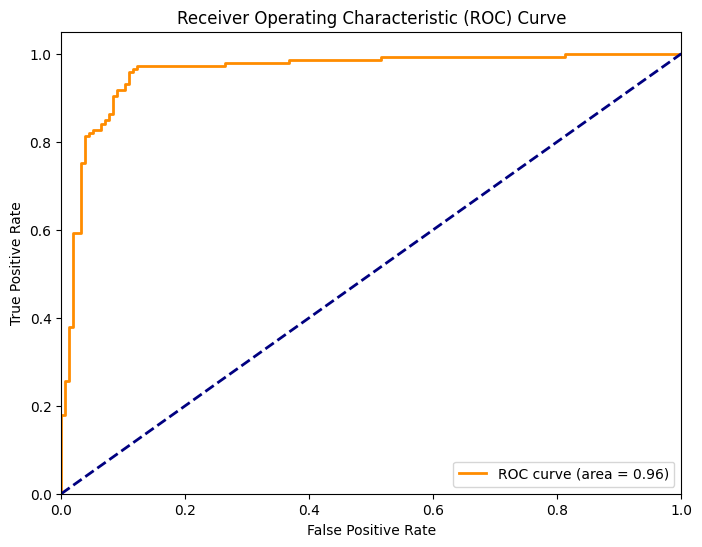

In [131]:
#plot roc-auc curve

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', linewidth=2, label='ROC curve (area = %0.2f)' % roc_auc)  # Plot ROC curve,
plt.plot([0, 1], [0, 1], color='navy', linewidth=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

17. Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate
accuracyM


In [132]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 20), (300, 20), (700,), (300,))

In [133]:
model = LogisticRegression(C=0.5)
model.fit(X_train,y_train)

LogisticRegression(C=0.5)

In [134]:
y_pred = model.predict(X_test)
print("The accuracy of the model is :", accuracy_score(y_test,y_pred))

The accuracy of the model is : 0.91


18. Write a Python program to train Logistic Regression and identify important features based on model
coefficientsM

In [135]:
from sklearn.datasets import load_iris

In [136]:
data = load_iris()

In [137]:
df = pd.DataFrame(data.data, columns = data.feature_names)

In [138]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [139]:
df['target'] = data.target

In [140]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [141]:
X= df.iloc[:,:-1]
y = df.target

In [142]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [143]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [145]:
X_train.shape,

((105, 4),)

In [146]:
model = LogisticRegression()
model.fit(X_train,y_train)
coef = model.coef_[0]

In [147]:
print(coef)

[-0.40538546  0.86892246 -2.2778749  -0.95680114]


In [148]:
imp_features = pd.DataFrame({"Feature": X_train.columns, "Coefficient": abs(coef)})

In [149]:
imp_features

,Feature,Coefficient
0,sepal length (cm),0.405385
1,sepal width (cm),0.868922
2,petal length (cm),2.277875
3,petal width (cm),0.956801


In [150]:
print("The most important features are:\n")
print(imp_features.sort_values(by = "Coefficient", ascending = False))

The most important features are:

             Feature  Coefficient
2  petal length (cm)     2.277875
3   petal width (cm)     0.956801
1   sepal width (cm)     0.868922
0  sepal length (cm)     0.405385


19. Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa
ScoreM

In [151]:
#using the same model as in Q18

y_pred = model.predict(X_test)
from sklearn.metrics import cohen_kappa_score
print("The cohen_kappa_score of the model is:", cohen_kappa_score(y_test,y_pred))

The cohen_kappa_score of the model is: 1.0


20. Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary
classification.

In [152]:
X,y = make_classification(n_samples = 1000, n_features = 20, n_informative = 10, n_redundant = 0, n_classes = 2, random_state = 1)

In [153]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [154]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [155]:
y_pred = model.predict(X_test)

In [160]:
y_pred_prob= model.predict_proba(X_test)[:,1]

In [161]:
from sklearn.metrics import precision_recall_curve,auc

In [163]:
precision, recall, threshold = precision_recall_curve(y_test, y_pred_prob)

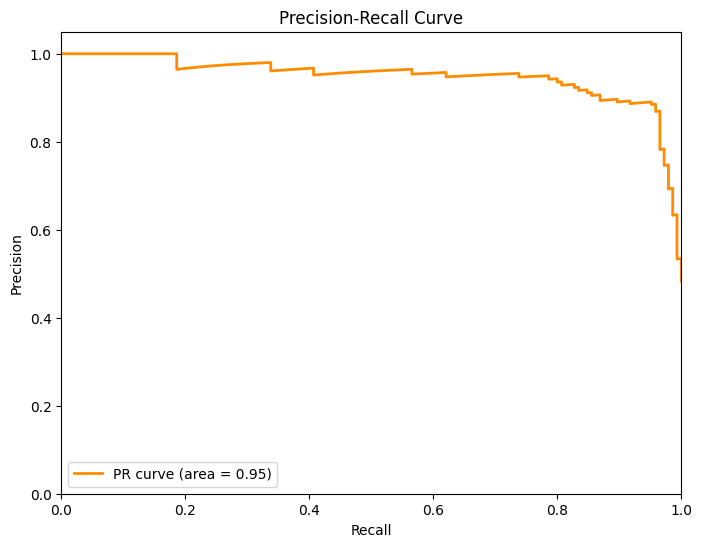

In [165]:
pr_auc = auc(recall, precision)

# Plotting the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', linewidth=2, label='PR curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

21. Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare
their accuracy

22. Write a Python program to train Logistic Regression and evaluate its performance using Matthews
Correlation Coefficient (MCC)

In [166]:
#using the model built in ques 20
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)

print("The Matthews Correlation Coefficient of the model is:", mcc)

The Matthews Correlation Coefficient of the model is: 0.7797647169767108


23. Write a Python program to train Logistic Regression on both raw and standardized data. Compare their
accuracy to see the impact of feature scaling

In [167]:
from sklearn.preprocessing import StandardScaler

print("--- Training without scaling ---")
model_raw = LogisticRegression()
model_raw.fit(X_train, y_train)

y_pred_raw = model_raw.predict(X_test)
accuracy_raw = accuracy_score(y_test, y_pred_raw)
print(f"Accuracy without scaling: {accuracy_raw:.4f}")

# --- Train model with scaling ---

print("\n--- Training with scaling ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy with scaling: {accuracy_scaled:.4f}")

# --- Comparison ---

print("\n--- Comparison ---")
print(f"Accuracy without scaling: {accuracy_raw:.4f}")
print(f"Accuracy with scaling: {accuracy_scaled:.4f}")

if accuracy_scaled > accuracy_raw:
    print("\nFeature scaling improved model performance.")
elif accuracy_scaled < accuracy_raw:
    print("\nFeature scaling decreased model performance.")
else:
    print("\nFeature scaling had no significant impact on model performance.")

--- Training without scaling ---
Accuracy without scaling: 0.8900

--- Training with scaling ---
Accuracy with scaling: 0.8900

--- Comparison ---
Accuracy without scaling: 0.8900
Accuracy with scaling: 0.8900

Feature scaling had no significant impact on model performance.


24.  Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using
cross-validation

In [171]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
model = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(model, param_grid, cv = 5 ,verbose = 2 , scoring = 'accuracy')
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END ............................................C=0.001; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END .............................................C=0.01; total time=   0.0s
[CV] END ..............................................C=0.1; total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='accuracy', verbose=2)

In [172]:
best_C = grid_search.best_params_['C']
print("The optimal value of C is:", best_C)

The optimal value of C is: 0.01


25. Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to
make predictions.

> not taught in self paced module 6 of Machine Learning